In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset to inspect its structure
file_path = (r'C:\Users\Rony\Downloads\Dataset .csv')
data = pd.read_csv(file_path)



In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Step 1: Handle missing values
data = data.dropna(subset=['Cuisines'])

# Step 2: Extract relevant columns for analysis
relevant_data = data[['Cuisines', 'Aggregate rating', 'Votes']].copy()

# Step 3: Split cuisines into individual types for broader analysis
relevant_data['Cuisines'] = relevant_data['Cuisines'].str.split(', ')

# Explode the 'Cuisines' column to handle multiple cuisines per row
exploded_data = relevant_data.explode('Cuisines')

# Display the cleaned and processed data
exploded_data.info(), exploded_data.head()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 19710 entries, 0 to 9550
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cuisines          19710 non-null  object 
 1   Aggregate rating  19710 non-null  float64
 2   Votes             19710 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 615.9+ KB


(None,
    Cuisines  Aggregate rating  Votes
 0    French               4.8    314
 0  Japanese               4.8    314
 0  Desserts               4.8    314
 1  Japanese               4.5    591
 2   Seafood               4.4    270)

##  Identify the Most Popular Cuisines Among Customers Based on the Number of Votes

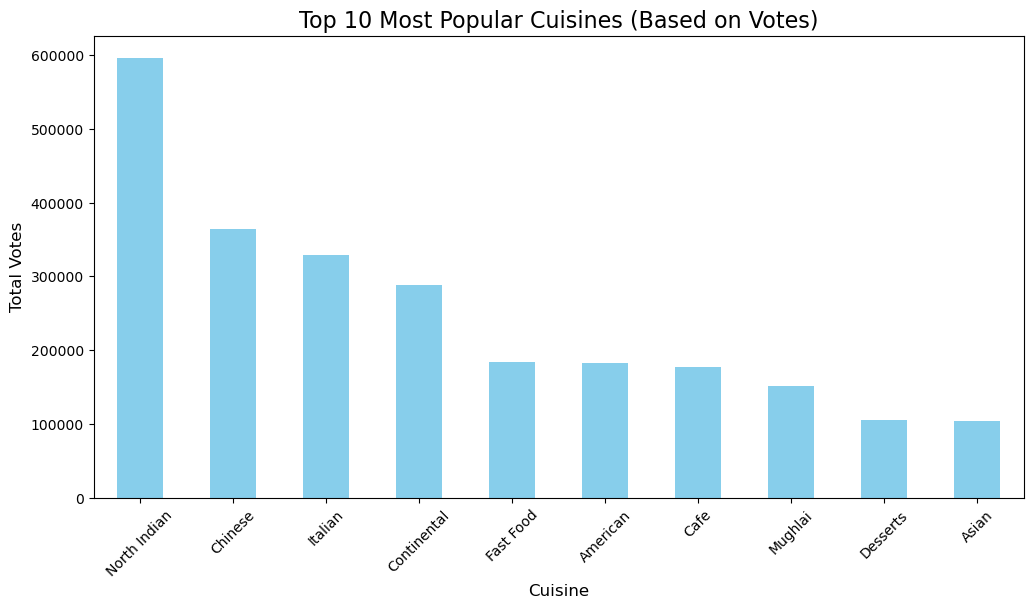

In [5]:
# Cuisine popularity based on total votes
cuisine_popularity = exploded_data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)


# Top 10 popular cuisines by votes
top_10_popular_cuisines = cuisine_popularity.head(10)


# Plotting popularity
plt.figure(figsize=(12, 6))
top_10_popular_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines (Based on Votes)', fontsize=16)
plt.ylabel('Total Votes', fontsize=12)
plt.xlabel('Cuisine', fontsize=12)
plt.xticks(rotation=45)
plt.show()





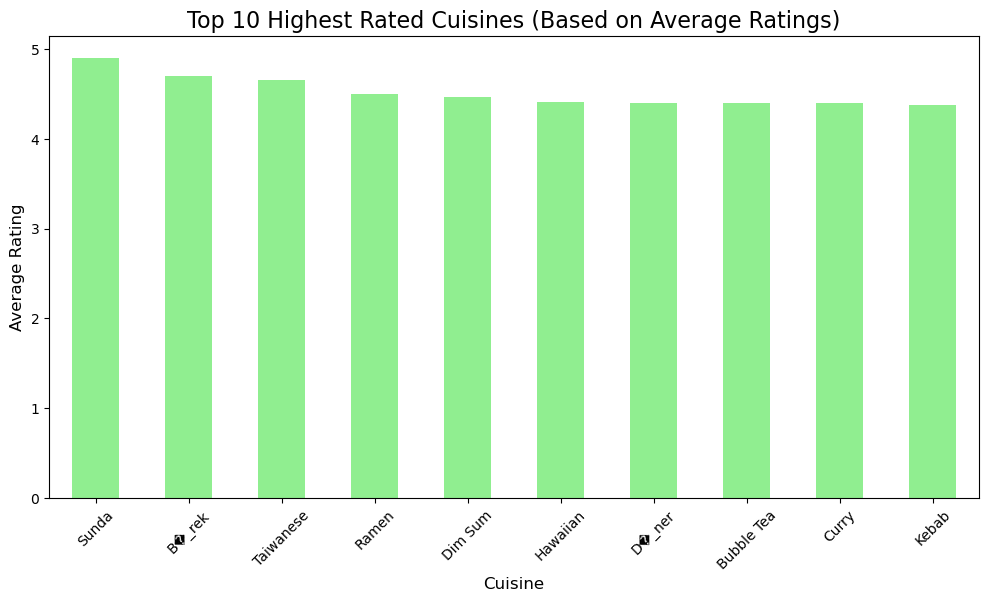

In [13]:
# Step 2: Average ratings by cuisine
cuisine_ratings = exploded_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)


# Plotting average ratings
plt.figure(figsize=(12, 6))
top_10_high_rated_cuisines.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Highest Rated Cuisines (Based on Average Ratings)', fontsize=16)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Cuisine', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [10]:
# Top 10 popular cuisines by votes
top_10_popular_cuisines = cuisine_popularity.head(10)

# Top 10 cuisines by average rating
top_10_high_rated_cuisines = cuisine_ratings.head(10)

In [11]:
# Displaying the top cuisines in each category
cuisine_popularity.head(10), cuisine_ratings.head(10)

(Cuisines
 North Indian    595981
 Chinese         364351
 Italian         329265
 Continental     288255
 Fast Food       184058
 American        183117
 Cafe            177568
 Mughlai         151946
 Desserts        105889
 Asian           104303
 Name: Votes, dtype: int64,
 Cuisines
 Sunda         4.900000
 B�_rek        4.700000
 Taiwanese     4.650000
 Ramen         4.500000
 Dim Sum       4.466667
 Hawaiian      4.412500
 D�_ner        4.400000
 Bubble Tea    4.400000
 Curry         4.400000
 Kebab         4.380000
 Name: Aggregate rating, dtype: float64)

## Observations
### North Indian, Chinese, and Italian cuisines are highly popular, indicating a large customer base.
### Some niche cuisines like Sunda, Börek, and Taiwanese receive exceptionally high ratings, likely reflecting their appeal to a niche audience.
### Fast food has many votes but does not appear among the highest-rated cuisines.